In [1]:
#Importing Libraries
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
#Bar plot,Scatter plot,Subplots-plotly graphs

In [5]:
df=pd.read_csv("heartfailure.csv")

In [6]:
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## EDA and Feature Engineering


In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

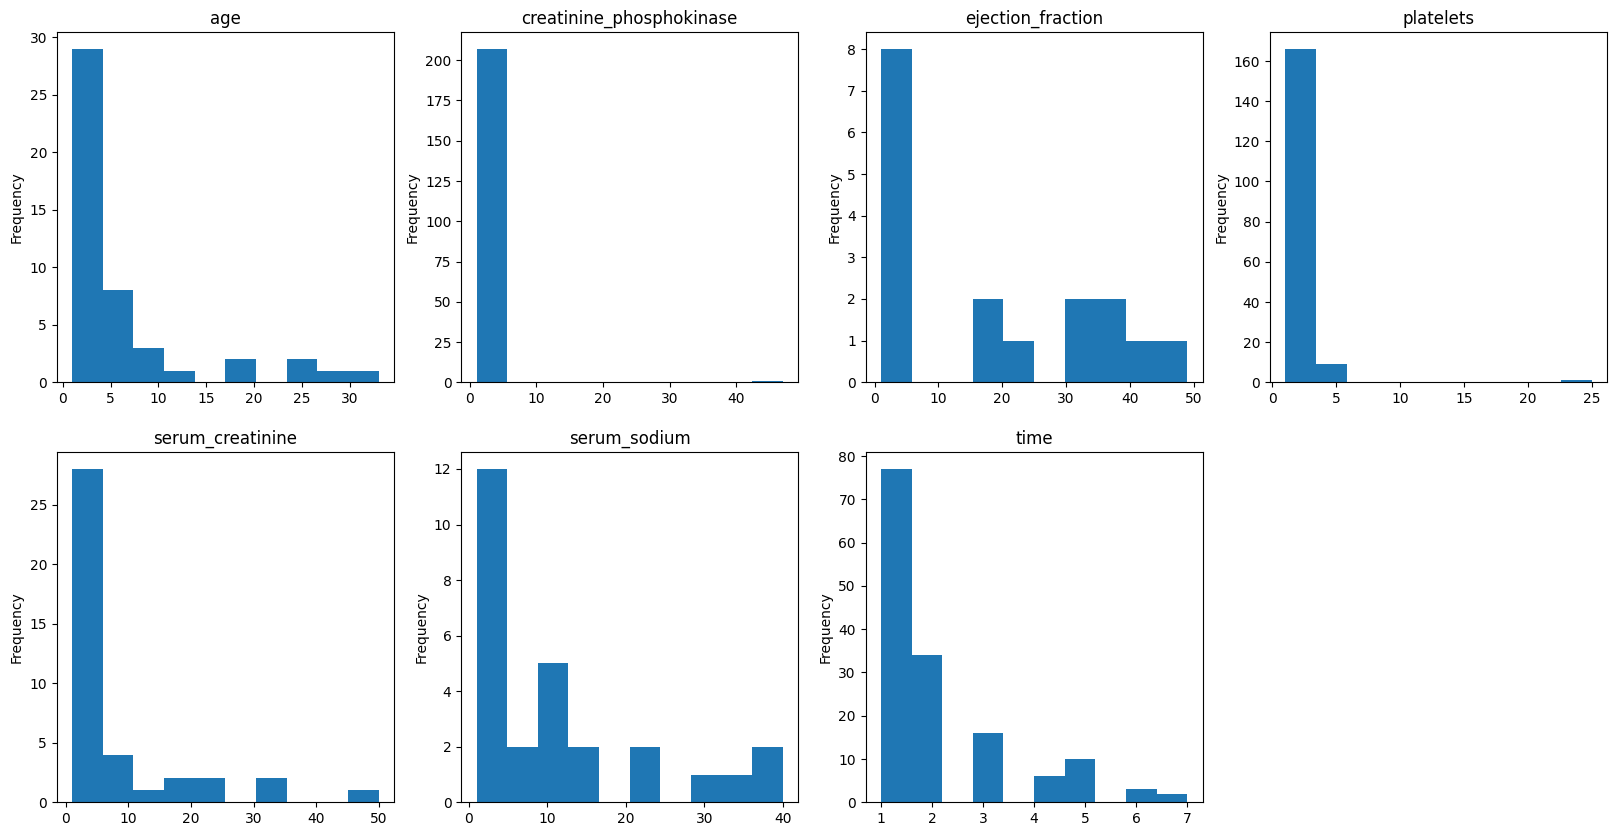

In [11]:
num_col = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
j =1 
fig = plt.figure(figsize =(20,10))
for i in num_col: 
    plt.subplot(2,4,j)
    df[i].value_counts().plot(kind ='hist')
    plt.title(i)
    j=j+1


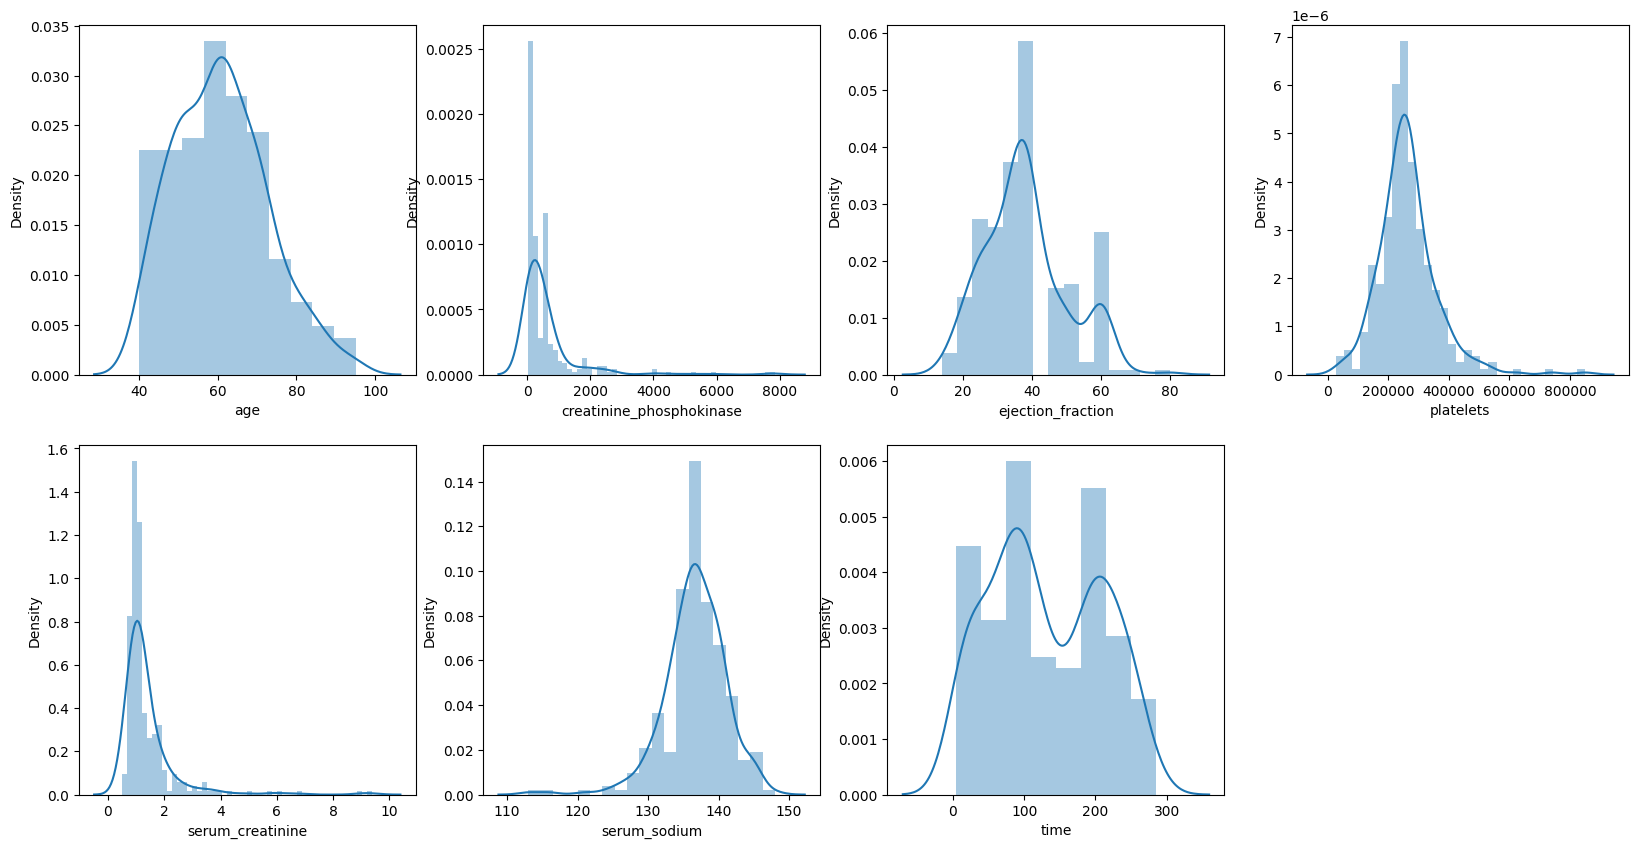

In [72]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.distplot(df[i])
    j=j+1

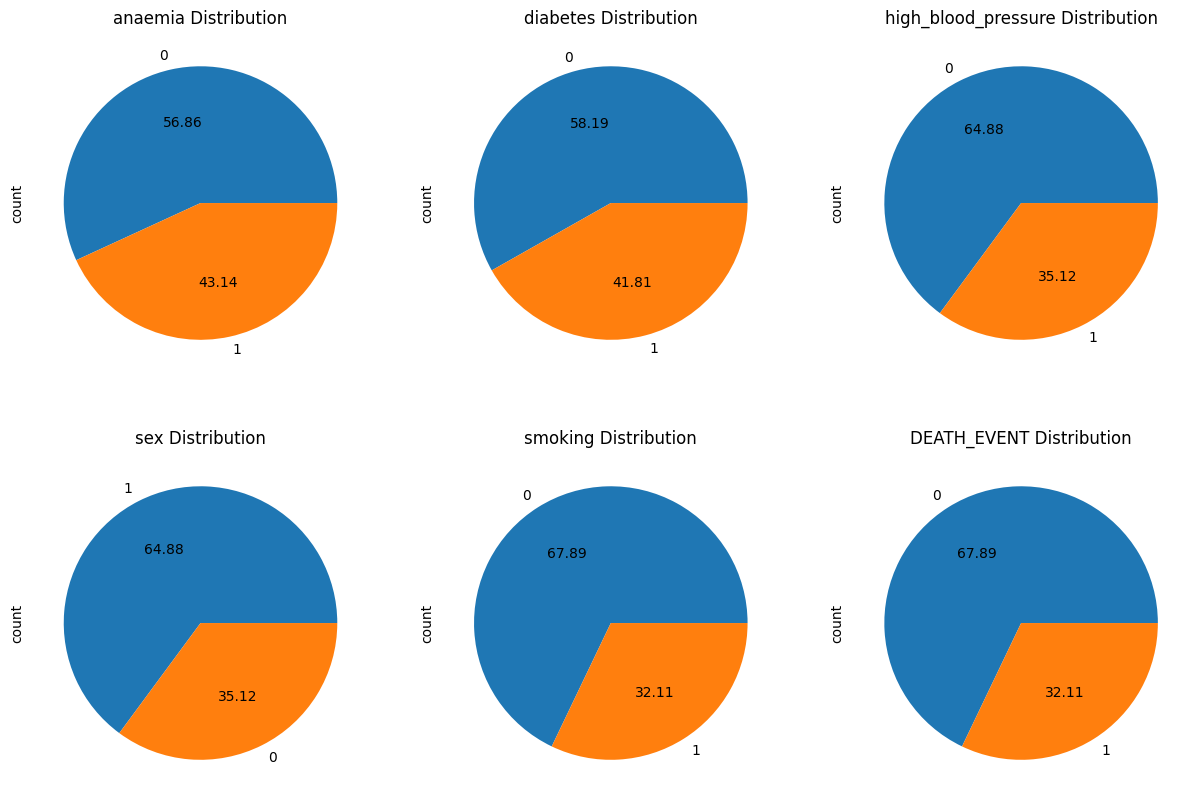

In [70]:
col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in col:
    plt.subplot(2,3,j)
    df[i].value_counts().plot(kind ='pie',autopct = '%.2f')
    plt.title(i + " Distribution")
    j=j+1
    

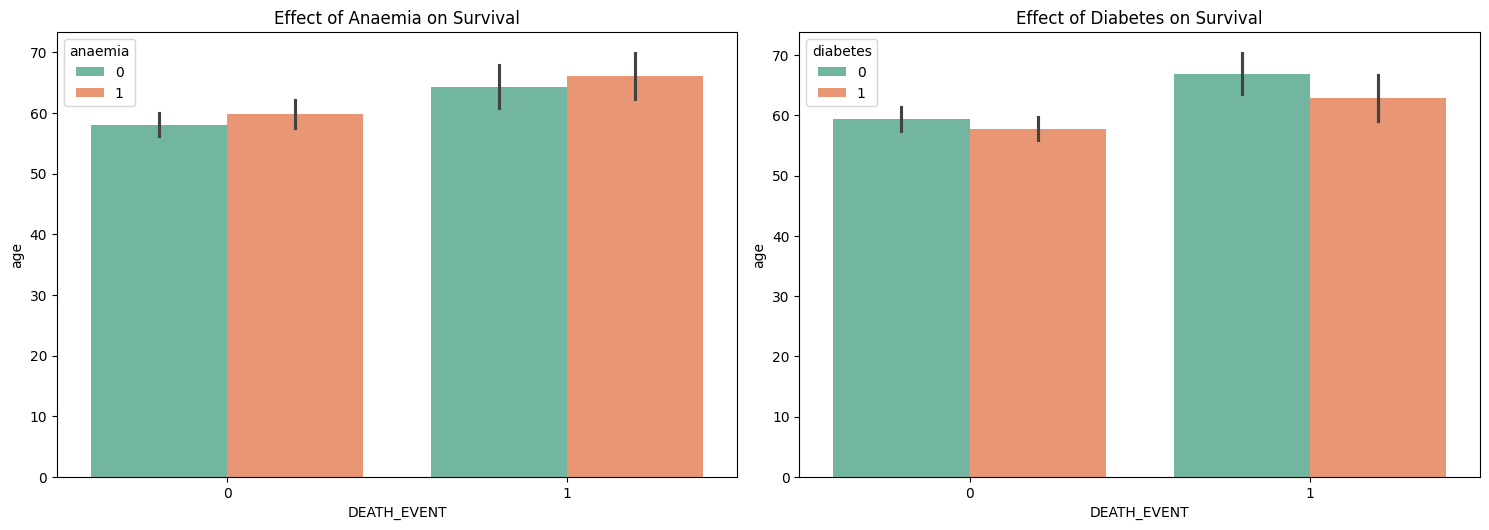

In [68]:
fig = plt.figure(figsize=(15, 10))

# First subplot: DEATH_EVENT vs Age with hue = Anaemia
plt.subplot(2, 2, 1)
sns.barplot(x='DEATH_EVENT', y='age', hue='anaemia', data=df,palette='Set2')
plt.title("Effect of Anaemia on Survival")

# Second subplot: DEATH_EVENT vs Age with hue = Diabetes
plt.subplot(2, 2, 2)
sns.barplot(x='DEATH_EVENT', y='age', hue='diabetes', data=df,palette='Set2')
plt.title("Effect of Diabetes on Survival")

plt.tight_layout() 
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

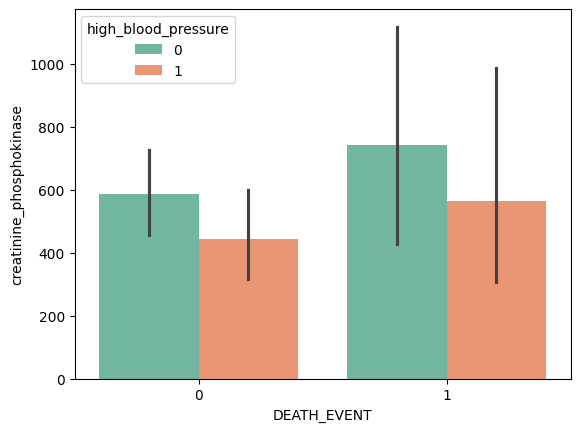

In [67]:
sns.barplot(x='DEATH_EVENT', y='creatinine_phosphokinase',hue='high_blood_pressure',data=df,palette='Set2')

<Axes: xlabel='anaemia', ylabel='creatinine_phosphokinase'>

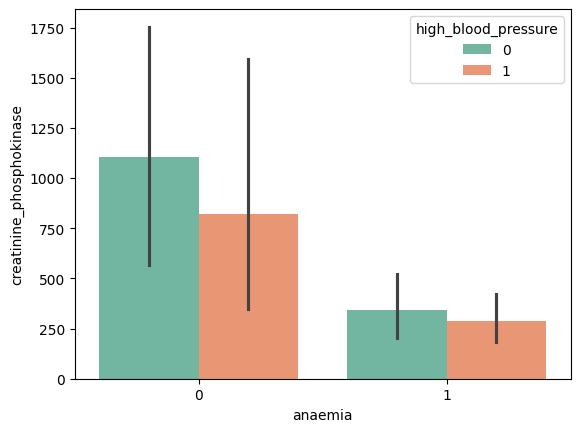

In [66]:
data = df[df['DEATH_EVENT'] == 1]
sns.barplot(x=data['anaemia'],y= data['creatinine_phosphokinase'] , hue =data['high_blood_pressure'] ,palette='Set2')

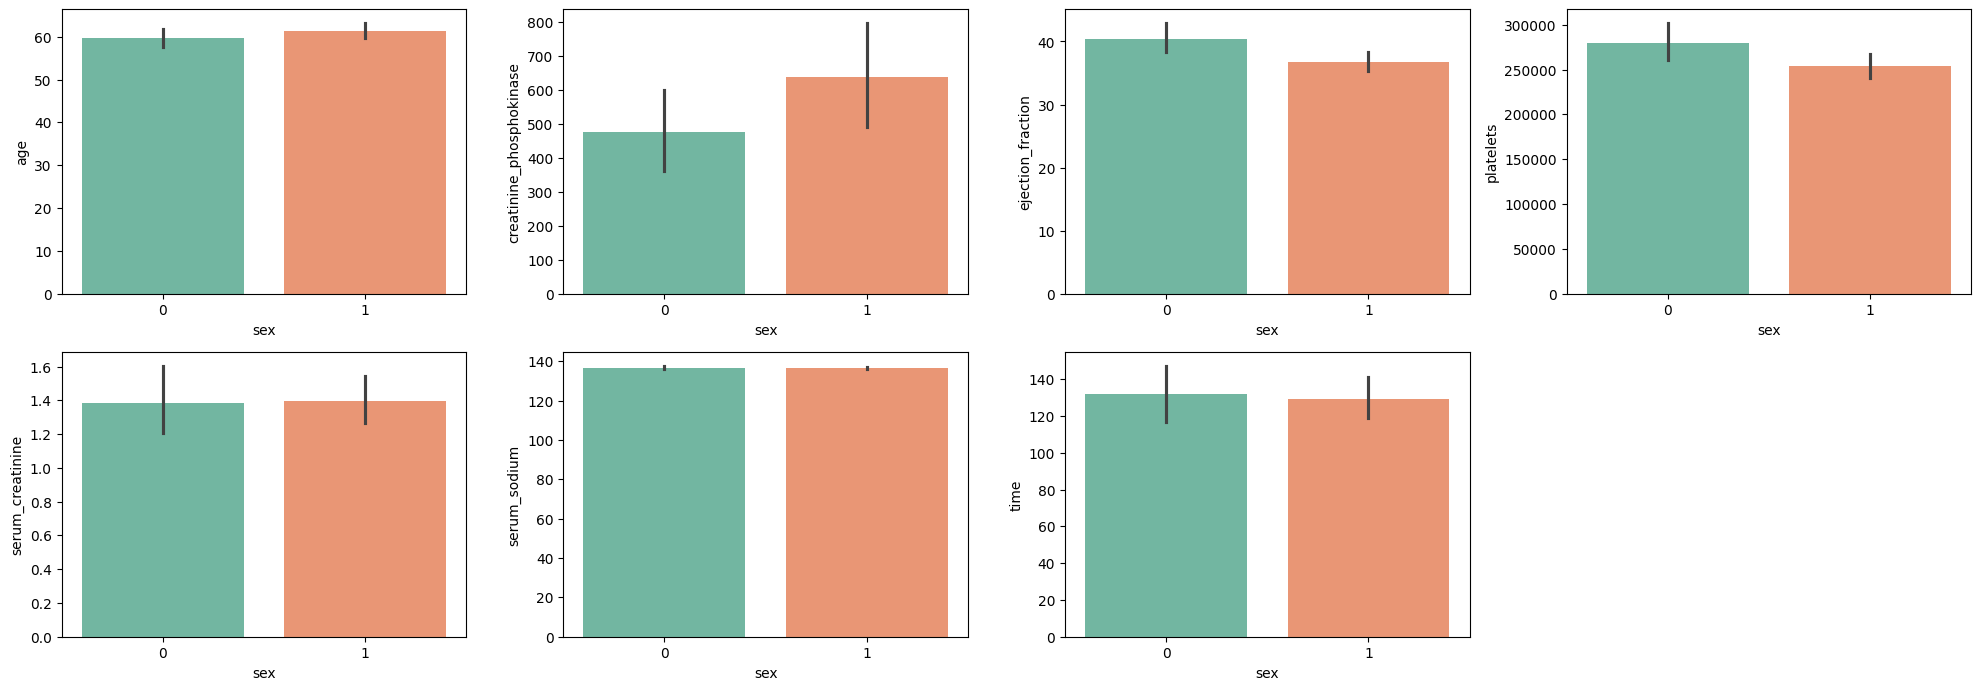

In [65]:
fig = plt.figure(figsize = (20,10))
j =1 
for i in num_col: 
    plt.subplot(3,4,j)
    sns.barplot(x=df['sex'], y=df[i],palette='Set2')
    j = j+1
plt.tight_layout()

<Axes: xlabel='age', ylabel='Density'>

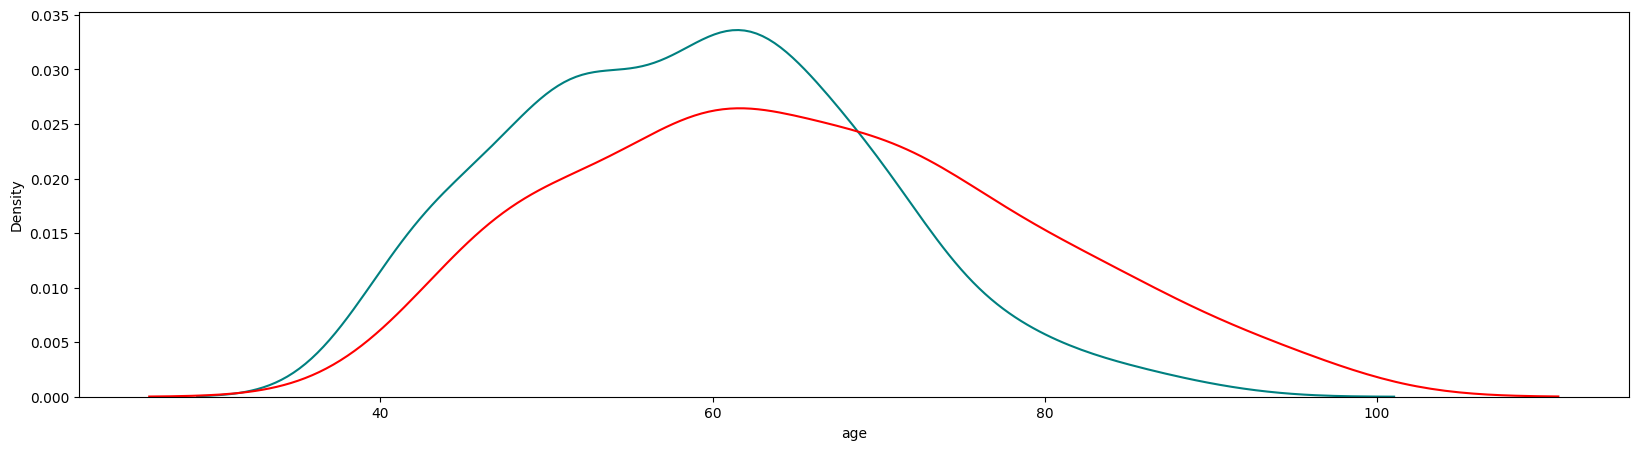

In [52]:
fig = plt.figure(figsize =(20,5))
sns.distplot(df[df['DEATH_EVENT'] == 0]['age'],hist = False,color = 'teal')
sns.distplot(df[df['DEATH_EVENT'] == 1]['age'],hist =False, color='red')

<Axes: xlabel='age', ylabel='Density'>

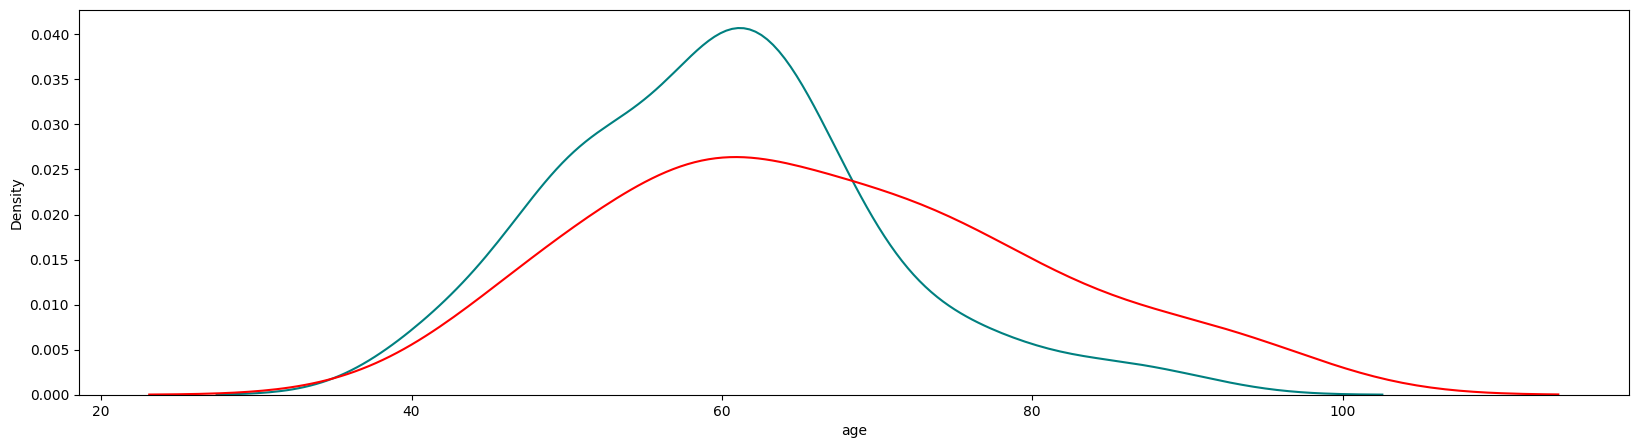

In [51]:
data1 =df[df['DEATH_EVENT'] == 1]
data2 =df[df['DEATH_EVENT'] == 0]


fig = plt.figure(figsize =(20,5))
sns.distplot(data2[data2['anaemia'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data1[data1['anaemia'] == 1]['age'],hist =False, color='red')

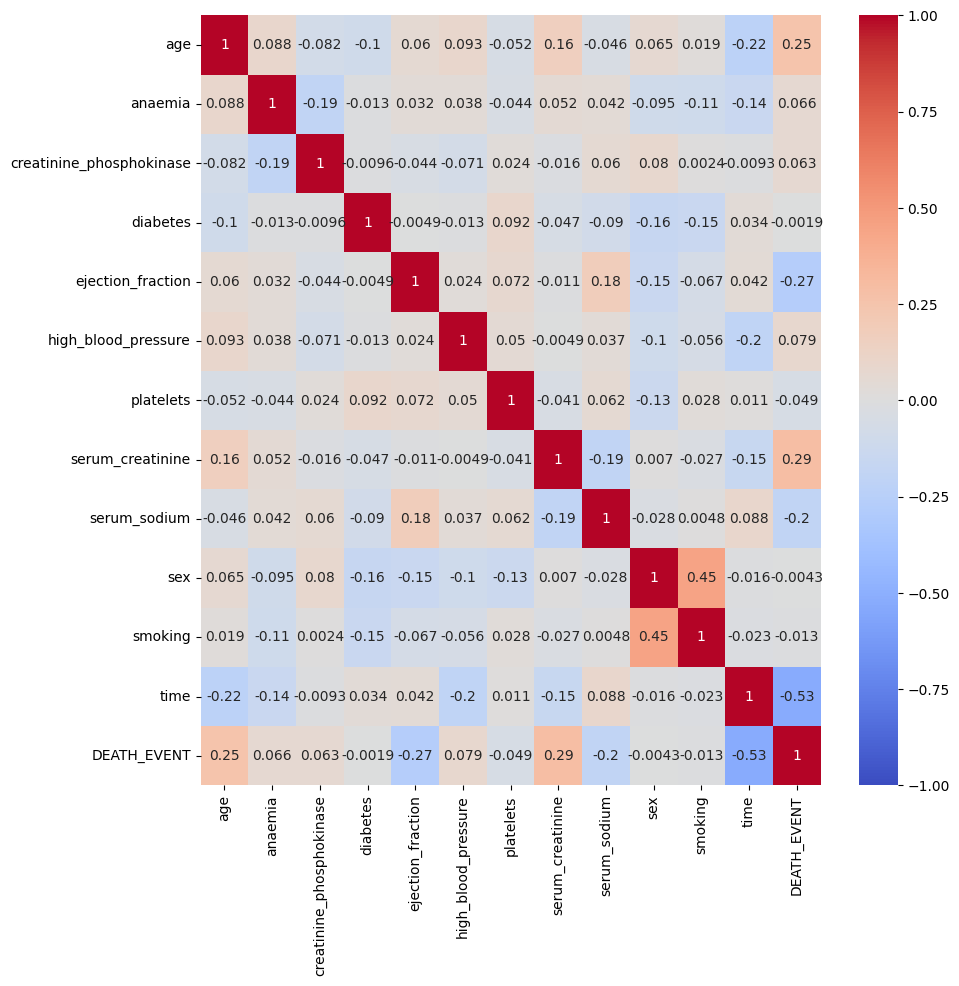

In [13]:

# Corelations
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),vmin=-1,cmap='coolwarm',annot=True);

## Training and Testing the data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [45]:
Feature=['high_blood_pressure','anaemia',
'age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time','smoking','sex']
x=df[Feature]
y=df["DEATH_EVENT"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [46]:
log_re=LogisticRegression()
log_re.fit(xtrain,ytrain)
log_re_pred=log_re.predict(xtest)

In [47]:

log_acc=accuracy_score(ytest,log_re_pred)
print("Logistic Accuracy Score: ","{:.2f}%".format(100*log_acc))

Logistic Accuracy Score:  86.67%


In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print("Accuracy Score:", accuracy_score(ytest, log_re_pred))
print("Recall Score:", recall_score(ytest, log_re_pred))
print("Precision Score:", precision_score(ytest, log_re_pred))


Accuracy Score: 0.8666666666666667
Recall Score: 0.7058823529411765
Precision Score: 0.8
